## Comparing of Reanalysis and Forecast Data  

Before performing following notebook, please regrid the ERA5 data on the same grid as the forecast data. This can be proceeded by using Cdo and the following command line: cdo remapbil,enfo_pf_2024_05_13.nc era5_18_19may.nc era5_regrid.nc (cdo remapbil,target.nc input.nc output.nc). 

In [2]:
# import modules and functions
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as crs
import cartopy.feature as cfeature
from shapely import geometry
import pandas as pd

import sys
sys.path.append('/home/jupyter-lreske/ESDP_project') # be sure that this path is correct/ exists
from functions import plots

In [3]:
plotter = plots()

In [4]:
# read in the data
era = xr.open_dataset('ESDP_project/era5_regrid.nc')
dt13_pf = xr.open_dataset('ESDP_project/enfo_pf_2024_05_13.nc')
dt14_pf = xr.open_dataset('ESDP_project/enfo_pf_2024_05_14.nc')
dt15_pf = xr.open_dataset('ESDP_project/enfo_pf_2024_05_15.nc')
dt16_pf = xr.open_dataset('ESDP_project/enfo_pf_2024_05_16.nc')
dt17_pf = xr.open_dataset('ESDP_project/enfo_pf_2024_05_17.nc')
dt18_pf = xr.open_dataset('ESDP_project/enfo_pf_2024_05_18.nc')

## Calculate mean of perturbed forecast and difference with ERA5

In [5]:
# define a region 
lat_min = 47.
lat_max = 55.
lon_min = 5.
lon_max = 15.5

# and a date
date = '2024-05-18'

In [8]:
list_of_files = [dt13_pf, dt14_pf, dt15_pf, dt16_pf, dt17_pf, dt18_pf]
region_data_mean = []
for file in list_of_files:
    file_mean = file.mean(dim='number')
    extract_datafile = plotter.extract_region(file_mean, lat_min, lat_max, lon_min, lon_max)
    region_data_mean.append(extract_datafile)

/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/jupyter-lreske/ESDP_project/functions.py:248: 

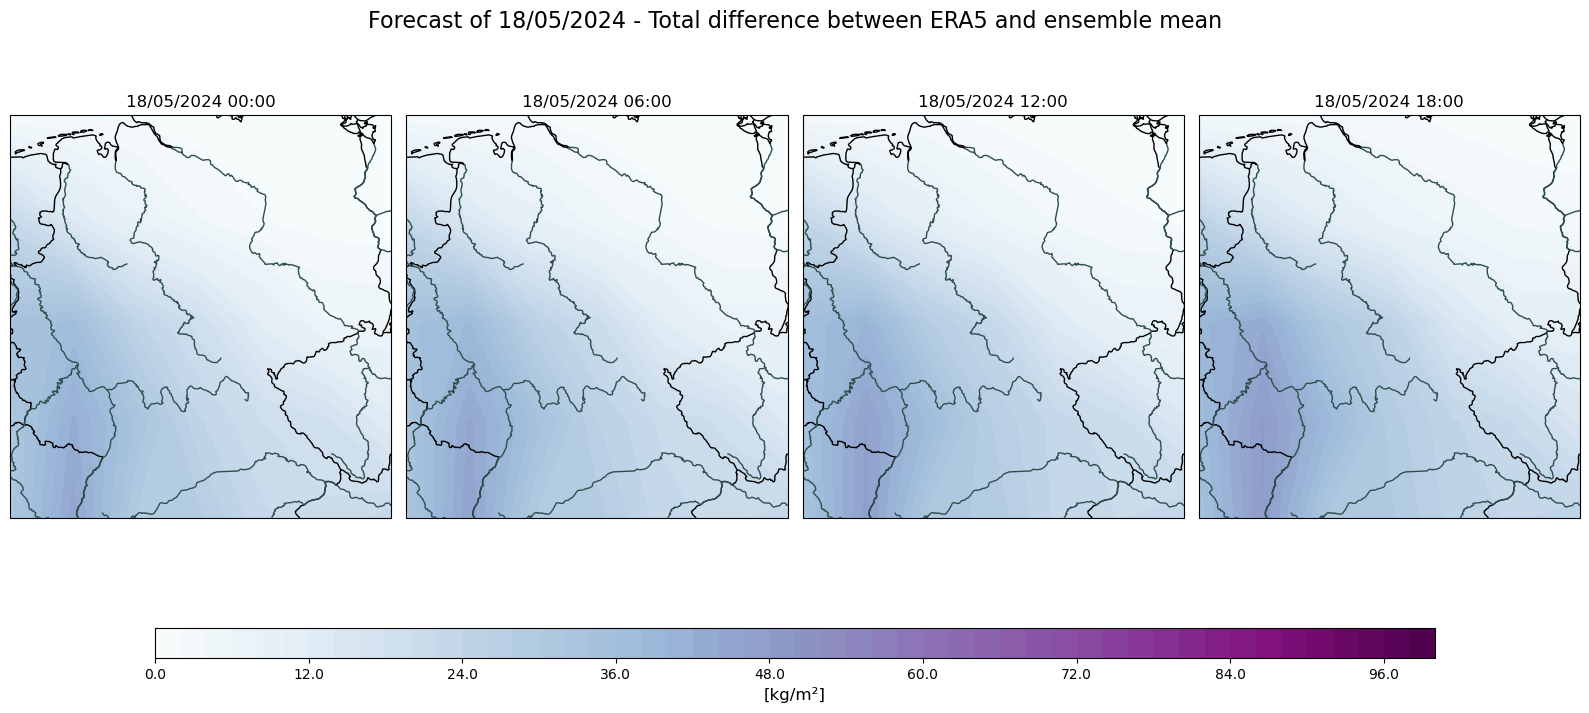

/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/jupyter-lreske/ESDP_project/functions.py:248: 

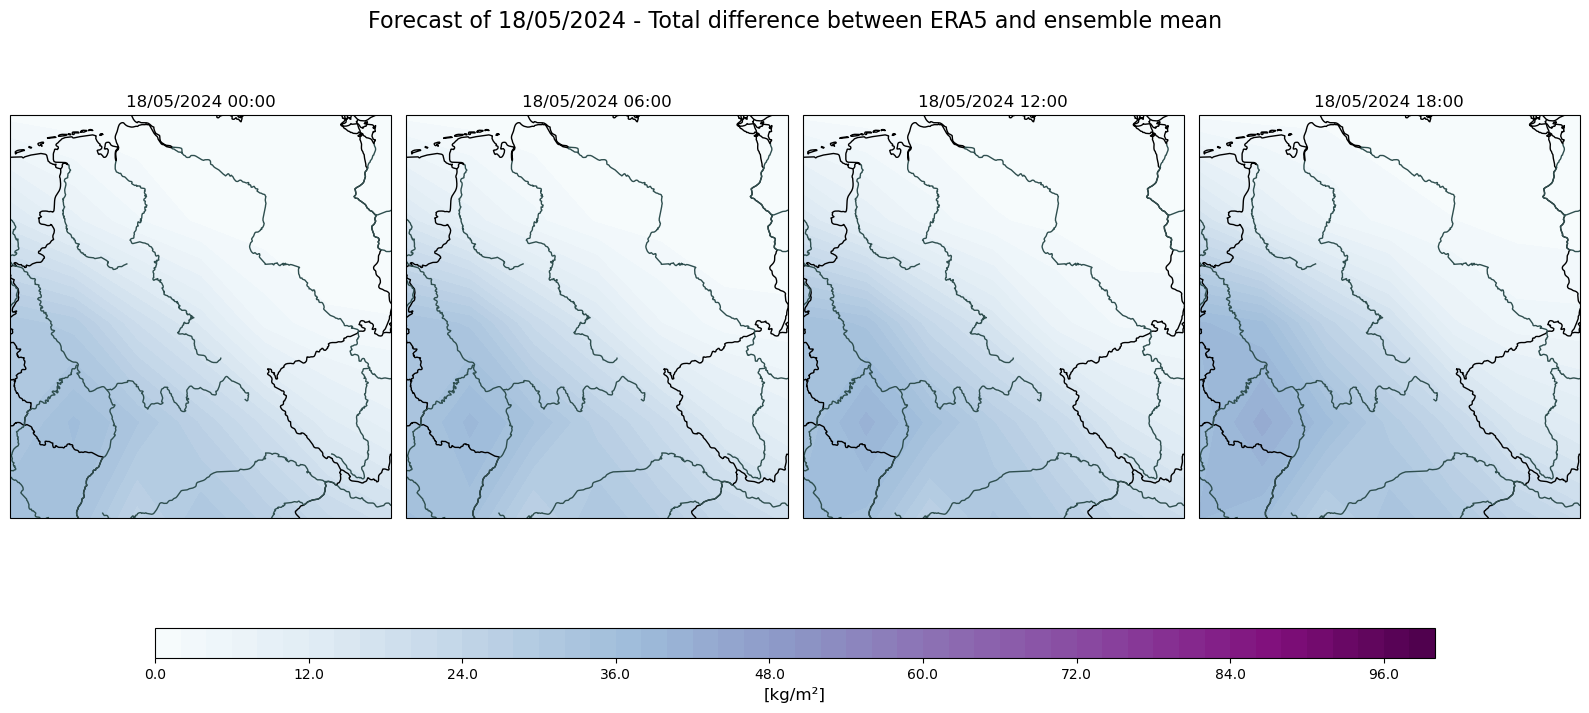

/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/jupyter-lreske/ESDP_project/functions.py:248: 

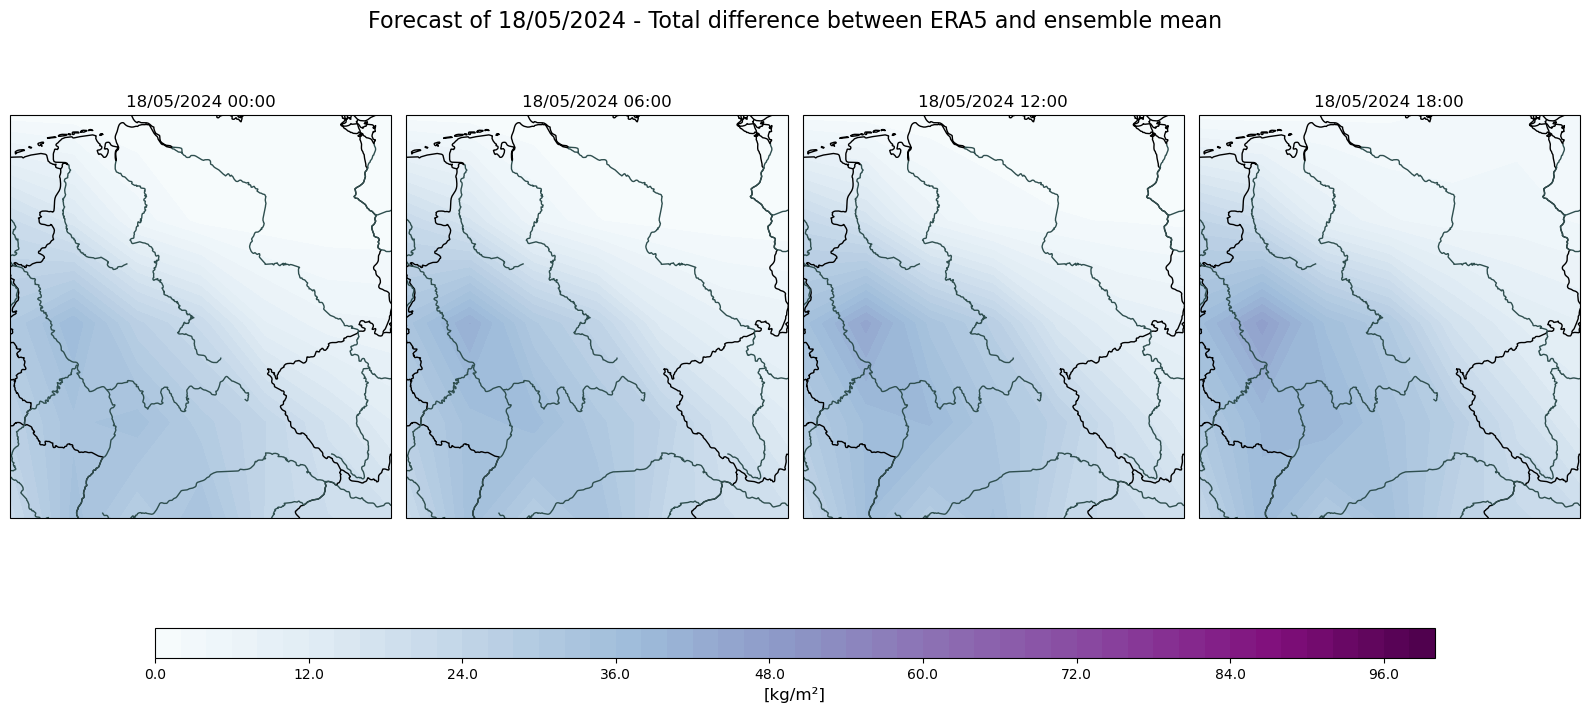

/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/jupyter-lreske/ESDP_project/functions.py:248: 

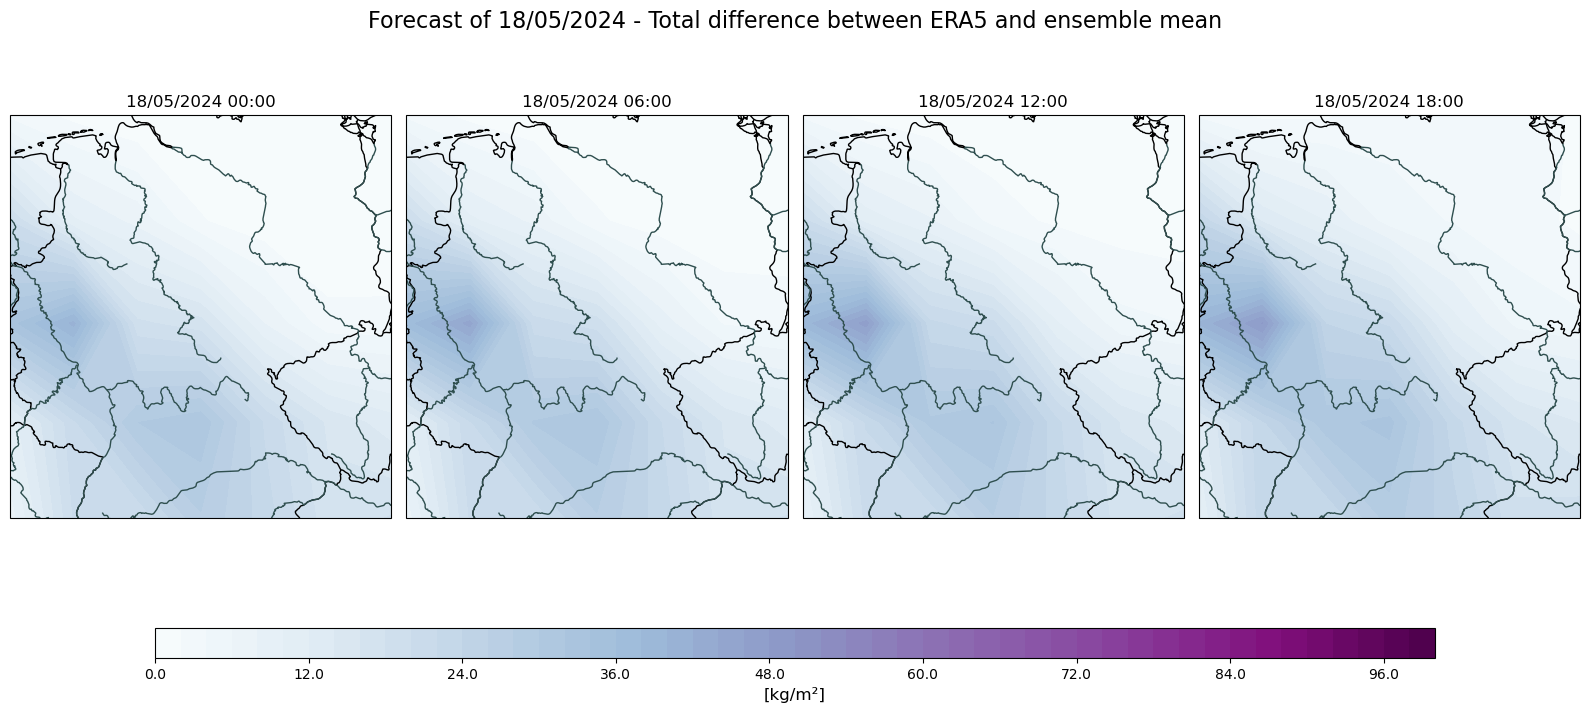

/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/jupyter-lreske/ESDP_project/functions.py:248: 

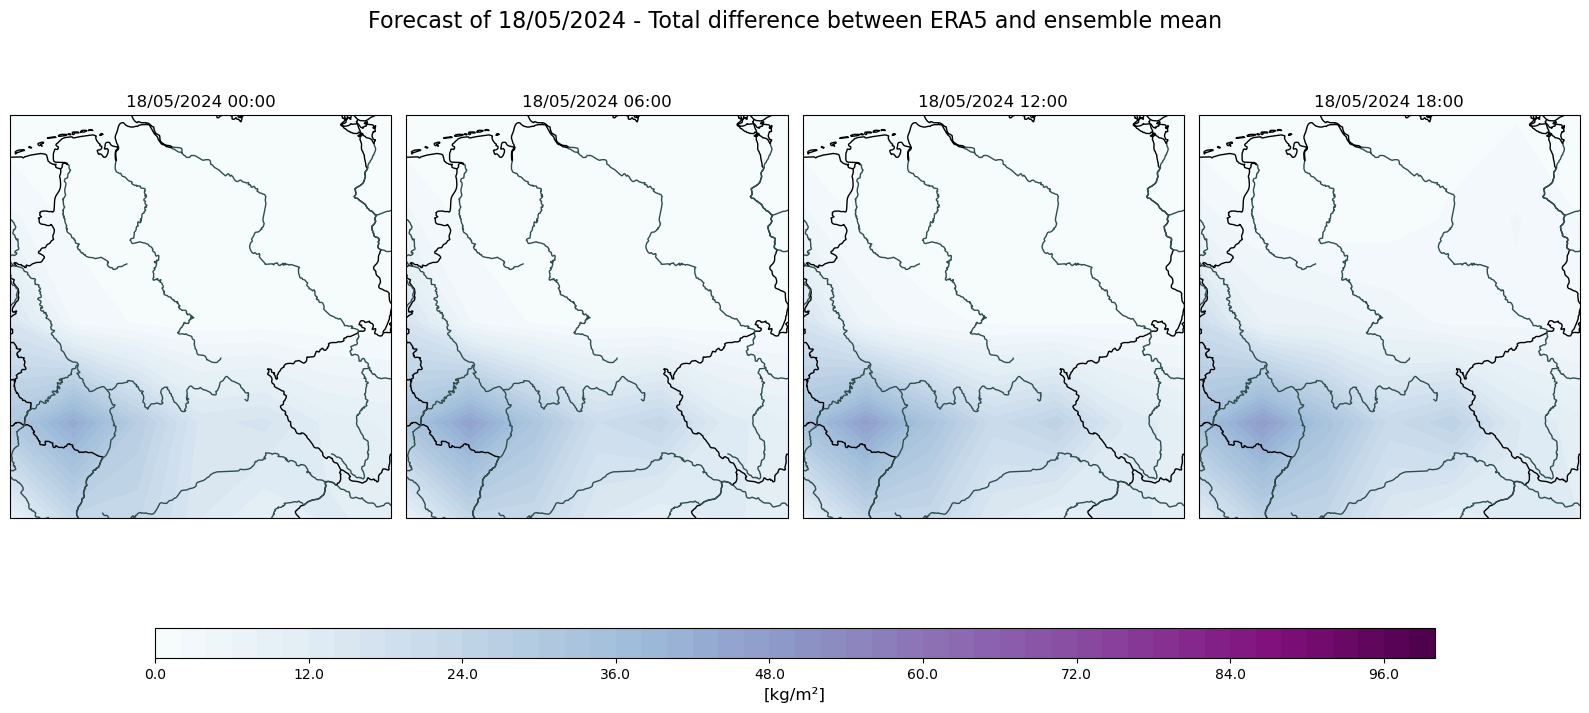

/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/opt/tljh/user/envs/py311_esdp/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/jupyter-lreske/ESDP_project/functions.py:248: 

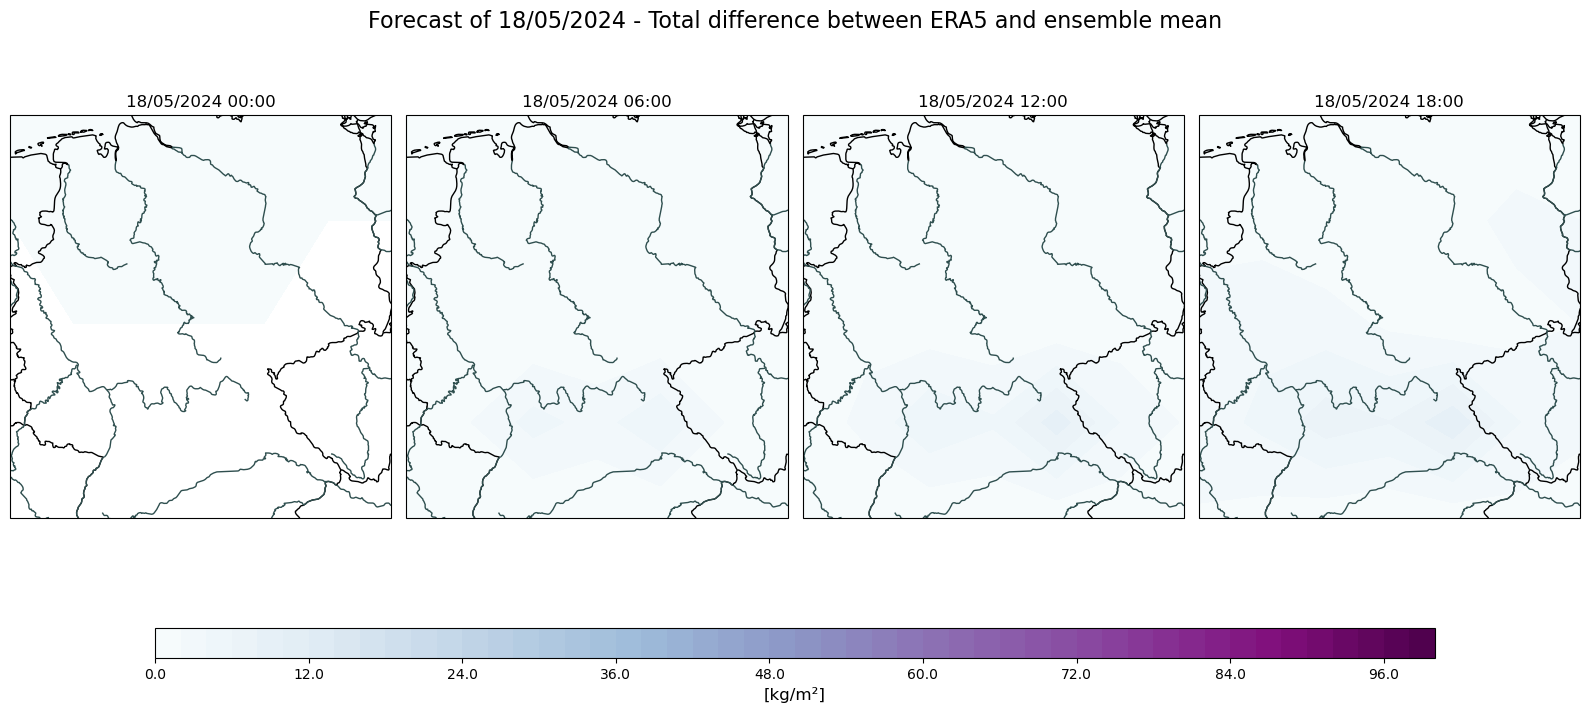

In [13]:
# plot difference between era5 and ensemble mean
comment = 'Total difference between Ensemble mean and ERA5'
for region in region_data_mean:
    diff = region - era
    plotter.plot_map_tp(diff, date, addtitle=comment)